In [ ]:
import pandas as pd
import gzip
import sys, os
import numpy as np
from tqdm.notebook import tqdm
#from emoji import UNICODE_EMOJI, demojize
import seaborn as sns
import warnings
import ast
warnings.filterwarnings('ignore')

%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
sys.path.insert(0, os.path.abspath('..'))

#from src.data import make_dataset, preprocessor



In [2]:
import matplotlib.pyplot as plt

#Dataset Preprocessing

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
sid_obj= SentimentIntensityAnalyzer()

In [ ]:
list = sid_obj.polarity_scores("no slow motion camera")
list['compound']

-0.296

In [ ]:
from textblob import TextBlob

In [ ]:
analysis = TextBlob("no slow motion camera")
analysis.sentiment.polarity

0.15000000000000002

In [ ]:
df = pd.read_csv(r'twitter.csv')
df.shape

(364875, 18)

In [ ]:
lang_count = df['language'].value_counts()

lang_count.index

Index(['en', 'fr', 'de', 'it', 'und', 'es', 'uk', 'ru', 'hi', 'pl', 'ja', 'tr',
       'nl', 'ar', 'pt', 'zh', 'th', 'fi', 'el', 'sv', 'ro', 'in', 'cs', 'lv',
       'ta', 'ko', 'ca', 'ur', 'fa', 'et', 'da', 'no', 'gu', 'sl', 'ht', 'iw',
       'tl', 'bn', 'vi', 'mr', 'lt', 'cy', 'te', 'eu', 'kn', 'bg', 'ml', 'or',
       'sr', 'hu', 'ka', 'pa', 'ckb', 'is', 'my', 'ne', 'am', 'ps', 'si', 'hy',
       'dv'],
      dtype='object')

In [ ]:
lang_count[:10]

en     254626
fr      18647
de      16446
it      15877
und     15613
es      12526
uk       4669
ru       4151
hi       3475
pl       2943
Name: language, dtype: int64

In [ ]:
#Remove the data that the text language is not English
df = df.drop(df[df['language']!="en"].index)

In [ ]:
import re
from bs4 import BeautifulSoup
from html import unescape
#Remove URLS
def remove_urls(x):
    cleaned_string = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', str(x), flags=re.MULTILINE)
    return cleaned_string

In [ ]:
#Unescape characters
def unescape_stuff(x):
    soup = BeautifulSoup(unescape(x), 'lxml')
    return soup.text

In [ ]:
#Replace conservative whitespaces
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

In [ ]:
#Remove emojis
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [ ]:
#Remove unwanted symbols
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string  

In [ ]:
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(remove_urls)
df['text'] = df['text'].apply(unescape_stuff)
df['text'] = df['text'].apply(deEmojify)
df['text'] = df['text'].apply(remove_symbols)
df['text'] = df['text'].apply(unify_whitespaces)

In [ ]:
df['text']

0          the ukrainian air force would like to address...
1         chernihiv oblast. ukrainians welcome their lib...
2         america is preparing for something worse than ...
3         just in anonymous has hacked released 62,000 e...
4          public mint now live for billionaire wmn win ...
                                ...                        
364866    14 year old yura from bucha told how a russian...
364869     russianukrainianwar ukrainerussianwar russia ...
364871     from where winston stood it was just possible...
364872    when i said tonight in front of 3000 people in...
364874                  we re back. no funny stuff ukraine 
Name: text, Length: 254626, dtype: object

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stemmer = nltk.PorterStemmer()

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
# remove twitter handles (@user)
import re
df['clean_tweet'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

In [ ]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,clean_tweet
0,0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04.000000,1509681950042198030,2022-04-01 00:00:00.000000,3412,the ukrainian air force would like to address...,[],en,NaN,0,2022-04-01 00:44:20.097867,the ukrainian air force would like to address...
1,1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34.000000,1509681950151348229,2022-04-01 00:00:00.000000,100,chernihiv oblast. ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,NaN,0,2022-04-01 00:09:37.148770,chernihiv oblast ukrainians welcome their lib...
2,2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01.000000,1509681950683926556,2022-04-01 00:00:00.000000,9,america is preparing for something worse than ...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,NaN,0,2022-04-01 00:09:37.125654,america is preparing for something worse than ...
3,3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44.000000,1509681951116046336,2022-04-01 00:00:00.000000,573,"just in anonymous has hacked released 62,000 e...","[{'text': 'Anonymous', 'indices': [25, 35]}]",en,NaN,0,2022-04-01 00:31:39.674382,just in anonymous has hacked released e...
4,4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,2022-03-20 04:04:40.000000,1509681951304990720,2022-04-01 00:00:00.000000,190,public mint now live for billionaire wmn win ...,[],en,NaN,0,2022-04-01 00:09:37.101459,public mint now live for billionaire wmn win ...


In [ ]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))
df.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,clean_tweet
0,0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04.000000,1509681950042198030,2022-04-01 00:00:00.000000,3412,the ukrainian air force would like to address...,[],en,NaN,0,2022-04-01 00:44:20.097867,the ukrainian air force would like address mis...
1,1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34.000000,1509681950151348229,2022-04-01 00:00:00.000000,100,chernihiv oblast. ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,NaN,0,2022-04-01 00:09:37.148770,chernihiv oblast ukrainians welcome their libe...
2,2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01.000000,1509681950683926556,2022-04-01 00:00:00.000000,9,america is preparing for something worse than ...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,NaN,0,2022-04-01 00:09:37.125654,america preparing for something worse than the...
3,3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44.000000,1509681951116046336,2022-04-01 00:00:00.000000,573,"just in anonymous has hacked released 62,000 e...","[{'text': 'Anonymous', 'indices': [25, 35]}]",en,NaN,0,2022-04-01 00:31:39.674382,just anonymous has hacked released emails from...
4,4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,2022-03-20 04:04:40.000000,1509681951304990720,2022-04-01 00:00:00.000000,190,public mint now live for billionaire wmn win ...,[],en,NaN,0,2022-04-01 00:09:37.101459,public mint now live for billionaire wmn win d...


In [ ]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [the, ukrainian, air, force, would, like, addr...
1    [chernihiv, oblast, ukrainians, welcome, their...
2    [america, preparing, for, something, worse, th...
3    [just, anonymous, has, hacked, released, email...
4    [public, mint, now, live, for, billionaire, wm...
Name: clean_tweet, dtype: object

In [ ]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [the, ukrainian, air, forc, would, like, addre...
1    [chernihiv, oblast, ukrainian, welcom, their, ...
2    [america, prepar, for, someth, wors, than, the...
3    [just, anonym, ha, hack, releas, email, from, ...
4    [public, mint, now, live, for, billionair, wmn...
Name: clean_tweet, dtype: object

In [ ]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

KeyError: ignored

#sentiment

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
sid_obj= SentimentIntensityAnalyzer()

In [ ]:
from textblob import TextBlob

In [ ]:
#2- postive 1- Neutral 0-negative
def sentiment_analysis(text):
    #analysis = TextBlob(text)

    analysis = sid_obj.polarity_scores(text)

    if (analysis['compound'] > 0):
        return 2
    elif(analysis['compound']  <0):
        return 0
    else: 
        return 1

   # if (analysis.sentiment.polarity > 0):
     #   return 2
   # elif(analysis.sentiment.polarity<0):
   #     return 0
  #  else: 
    #    return 1

In [ ]:
df['sentiment'] = df['clean_tweet'].apply(lambda x : sentiment_analysis(x))

In [ ]:
data = df[['clean_tweet', 'sentiment']]

In [ ]:
data.to_csv("pre_process(vader).csv", encoding='utf-8')

#Exploring the Dataset

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


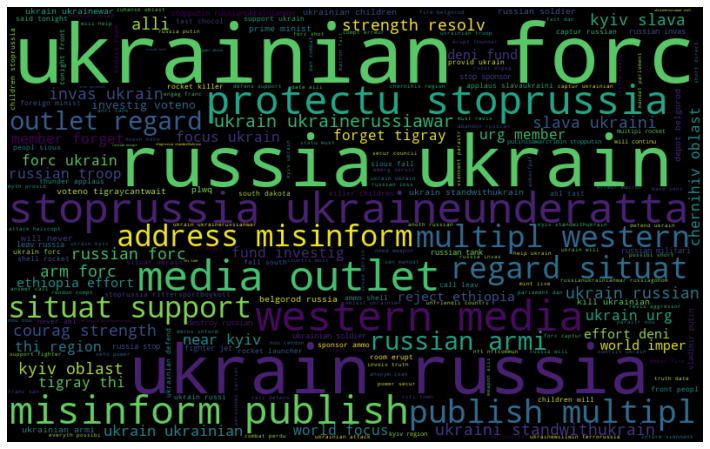

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

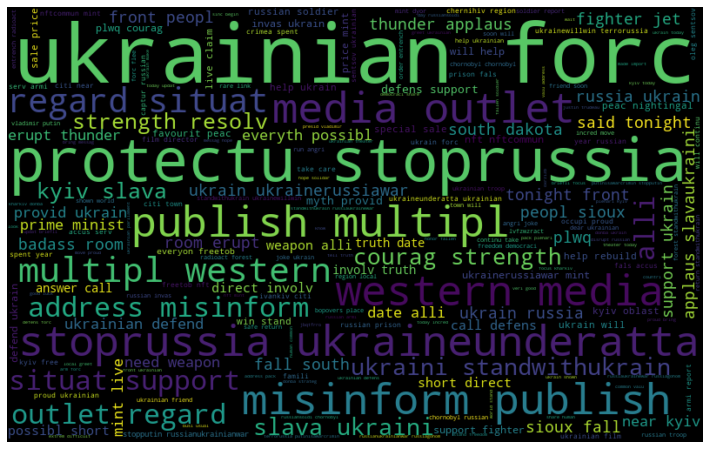

In [ ]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['sentiment']==2]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

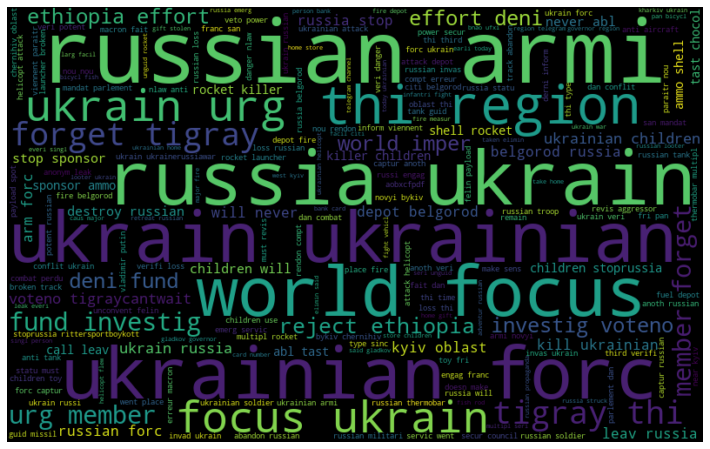

In [ ]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['sentiment']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

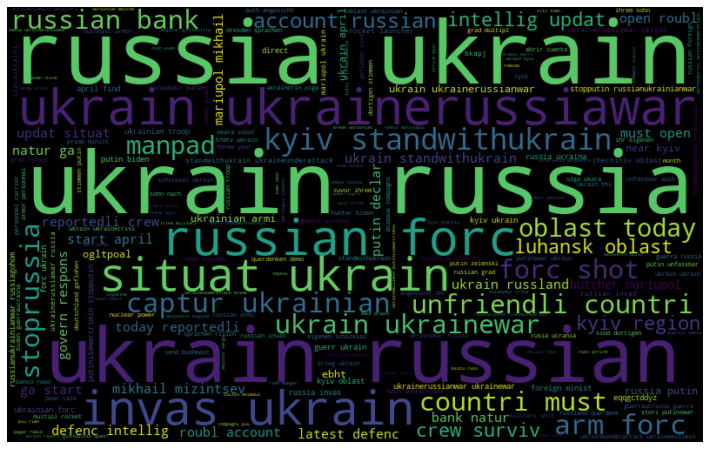

In [ ]:
# frequent words visualization for Neutral
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['sentiment']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_neg = data[data['sentiment'] == 0]
df_neg.shape

(118204, 2)

In [ ]:
df_pos = data[data['sentiment'] == 2]
df_pos.shape

(99616, 2)

In [ ]:
df_nue = data[data['sentiment'] == 1]

In [ ]:
df_nue.shape

(36806, 2)

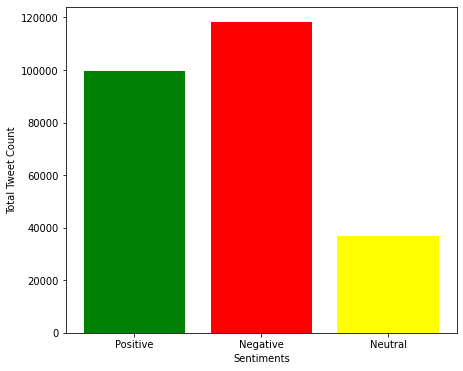

In [3]:
x = ['Positive', 'Negative','Neutral']
y = [99616, 118204,36806]
plt.figure(figsize=(7,6))
plt.bar(x, y, color=['green', 'red', 'yellow'])
plt.xlabel('Sentiments')
plt.ylabel('Total Tweet Count')
plt.show()

#Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [ ]:
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df=2, max_features = 50000, stop_words='english')

bow = bow_vectorizer.fit_transform(data['clean_tweet'])

bow.shape

(254626, 41205)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df=2, max_features = 50000, stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(data['clean_tweet'])

tfidf.shape

(254626, 41205)

#Dataset splitting

In [ ]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(bow, data['sentiment'], test_size = 0.20, random_state = 0)

print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(203700, 41205)
(203700,)
(50926, 41205)
(50926,)


In [ ]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(tfidf, data['sentiment'], test_size = 0.25, random_state = 0)

print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(273656, 50000)
(273656,)
(91219, 50000)
(91219,)


#Model Training
Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(max_iter = 1000, random_state = 0)
model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)
print(cm)

KeyboardInterrupt: ignored

In [ ]:
print('Acurracy = ' ,metrics.accuracy_score(y1_test, y1_pred))

NameError: ignored

In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     28008
           1       0.98      0.99      0.98     24626
           2       0.98      0.97      0.98     20341

    accuracy                           0.98     72975
   macro avg       0.98      0.98      0.98     72975
weighted avg       0.98      0.98      0.98     72975



In [ ]:
model.fit(X2_train, y2_train)

y2_pred = model.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)

[[34016   571   370]
 [  118 30386   283]
 [  374   813 24288]]


In [ ]:
print('Acurracy = ' ,metrics.accuracy_score(y1_test, y1_pred))

In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     34957
           1       0.96      0.99      0.97     30787
           2       0.97      0.95      0.96     25475

    accuracy                           0.97     91219
   macro avg       0.97      0.97      0.97     91219
weighted avg       0.97      0.97      0.97     91219



#Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model = MultinomialNB()
model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)

print(cm)

[[26171   532  1305]
 [ 4556 17679  2391]
 [ 2365   478 17498]]


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86     28008
           1       0.95      0.72      0.82     24626
           2       0.83      0.86      0.84     20341

    accuracy                           0.84     72975
   macro avg       0.85      0.84      0.84     72975
weighted avg       0.85      0.84      0.84     72975



In [ ]:
model.fit(X2_train, y2_train)

y2_pred = model.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)

[[32886   782  1289]
 [ 5381 23179  2227]
 [ 3312   747 21416]]


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86     34957
           1       0.94      0.75      0.84     30787
           2       0.86      0.84      0.85     25475

    accuracy                           0.85     91219
   macro avg       0.86      0.84      0.85     91219
weighted avg       0.86      0.85      0.85     91219



#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)

print(cm)

[[27232   335   441]
 [  164 24207   255]
 [  429   406 19506]]


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9479
           1       0.99      0.99      0.99     46710
           2       0.98      0.97      0.97     16786

    accuracy                           0.98     72975
   macro avg       0.98      0.97      0.97     72975
weighted avg       0.98      0.98      0.98     72975



In [ ]:
model.fit(X2_train, y2_train)

y2_pred = model.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)

[[11265   359   295]
 [  249 57658   349]
 [  244   530 20270]]


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11919
           1       0.98      0.99      0.99     58256
           2       0.97      0.96      0.97     21044

    accuracy                           0.98     91219
   macro avg       0.97      0.97      0.97     91219
weighted avg       0.98      0.98      0.98     91219



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)

print(cm)

[[69940   235]
 [ 1352 19692]]


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     70175
           1       0.99      0.94      0.96     21044

    accuracy                           0.98     91219
   macro avg       0.98      0.97      0.98     91219
weighted avg       0.98      0.98      0.98     91219



In [ ]:
model.fit(X2_train, y2_train)

y2_pred = model.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)

[[69947   228]
 [ 1462 19582]]


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     70175
           1       0.99      0.93      0.96     21044

    accuracy                           0.98     91219
   macro avg       0.98      0.96      0.97     91219
weighted avg       0.98      0.98      0.98     91219

